In [199]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import community as community_louvain

In [201]:
airports_df = pd.read_csv(r"downloads/Airports2.csv")

### *5. Finding and Extracting Communities*

 ***1. In this task, you are asked to analyze the graph and identify the communities based on the flight network provided. For the airline, the primary focus is on the cities, so your communities should reflect the connectivity between cities through the flights that link them.***


Function: `analyze_flight_network`

This function analyzes the flight network based on a given `airports_df` (pandas DataFrame containing flight data) and checks if two cities (`c1`, `c2`) belong to the same community using the **Louvain community detection** algorithm.

1. **Building the Graph**:
   - The `edges` DataFrame is created by selecting `Origin_city`, `Destination_city`, and `Passengers`, then grouping by `Origin_city` and `Destination_city`, summing up passengers to account for multiple flights between cities.
   - A NetworkX graph `G` is created, and edges are added to the graph with the city pairs and passenger count.

2. **Louvain Community Detection**:
   - The `community_louvain.best_partition(G)` function detects communities in the graph `G`. The result is a dictionary `partition` where each key is a city and its value is the community ID to which the city belongs.

3. **Output the Total Number of Communities**:
   - The communities are grouped by their community ID. The function counts and prints the total number of communities and lists the cities in each community.

4. **Subgraph Visualization**:
   - The largest community (based on the number of cities) is identified.
   - A subgraph is created containing only the cities in the largest community.
   - The `spring_layout` function is used for a force-directed layout of the subgraph to improve node spread.
   - The graph is drawn with:
     - **Node colors**: Based on the community each city belongs to.
     - **Edge transparency**: Set to 50% opacity for visual clarity.
     - **Node labels**: Displaying the first 10 cities in the largest community.
     - **Edge labels**: Showing city pairs and passenger counts.

5. **Check if Two Cities Belong to the Same Community**:
   - The function checks if both cities `c1` and `c2` are in the graph and belong to the same community. It prints a message indicating whether they are in the same community or not.

6. **Final Community Overview**:
   - The function prints a summary of all the communities detected, showing the first 10 cities of each community.

Key Libraries/Functions Used:
- **NetworkX (`nx`)**: For creating and analyzing the graph.
- **Community Louvain (`community_louvain`)**: For detecting communities using the Louvain method.
- **Matplotlib (`plt`)**: For graph visualization (subgraph layout, node/edge colors, labels).
- **`spring_layout`**: A layout algorithm for positioning nodes in a visually appealing way.

Summary:
- The function builds a graph from flight data, applies the Louvain community detection method, visualizes the largest community, and checks if two specified cities belong to the same community. It outputs detailed community information and a visualization of the largest community.


In [239]:

def analyze_flight_network(airports_df, c1, c2):
    # Create the graph based on the flight data
    edges = airports_df[['Origin_city', 'Destination_city', 'Passengers']]
    edges = edges.groupby(['Origin_city', 'Destination_city']).agg({'Passengers': 'sum'}).reset_index()

    G = nx.Graph()

    for _, row in edges.iterrows():
        G.add_edge(row['Origin_city'], row['Destination_city'], passengers=row['Passengers'])

    # Apply Louvain community detection
    partition = community_louvain.best_partition(G)

    # 1. Output the total number of communities and the cities in each community
    community_groups = {}
    for city, community_id in partition.items():
        if community_id not in community_groups:
            community_groups[community_id] = []
        community_groups[community_id].append(city)
    
    print(f"Total number of communities: {len(community_groups)}")
    for community_id, cities in community_groups.items():
        print(f"Community {community_id}: {', '.join(cities)}")

    # 2. Subgraph Visualization: Focus on the largest community or top N cities
    largest_community_id = max(community_groups, key=lambda x: len(community_groups[x]))
    largest_community = community_groups[largest_community_id]
    subgraph = G.subgraph(largest_community)

    # Extract community colors for nodes in the subgraph
    subgraph_partition = {city: partition[city] for city in subgraph.nodes()}

    # Force-directed layout with more spread
    pos = nx.spring_layout(subgraph, k=1.0, iterations=50, seed=42)  # Increase 'k' and 'iterations' for better spread

    plt.figure(figsize=(20, 20))  # Larger figure size

    # Draw nodes with colors corresponding to their community
    node_colors = [subgraph_partition[node] for node in subgraph.nodes()]
    nx.draw_networkx_nodes(subgraph, pos, node_size=100, cmap=plt.cm.rainbow, node_color=node_colors)

    # Draw edges with reduced transparency
    nx.draw_networkx_edges(subgraph, pos, alpha=0.5, width=1.0)

    # Draw node labels for hubs or important cities only (adjust for readability)
    labels = {city: city for city in list(largest_community)[:10]}  # Only label the first 10 cities
    nx.draw_networkx_labels(subgraph, pos, labels, font_size=12, font_weight='bold')

    # Draw edge labels with both city names and passenger count on the edge
    edge_labels = {}
    for u, v, d in subgraph.edges(data=True):
        label = f"{u} -> {v}\nPassengers: {d['passengers']}"
        edge_labels[(u, v)] = label

    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Largest Community in Flight Network", fontsize=16)
    plt.axis('off')  # Turn off axis for better visualization
    plt.show()

    # 3. Check if city c1 and c2 belong to the same community
    if c1 in partition and c2 in partition:
        if partition[c1] == partition[c2]:
            print(f"{c1} and {c2} belong to the same community.")
        else:
            print(f"{c1} and {c2} do not belong to the same community.")
    else:
        print(f"One or both of the cities {c1} and {c2} are not in the network.")

    community_groups = {}
    for city, community_id in partition.items():
        if community_id not in community_groups:
            community_groups[community_id] = []
        community_groups[community_id].append(city)

    print(f"\nTotal communities detected: {len(community_groups)}")
    for community_id, cities in community_groups.items():
        print(f"Community {community_id}: {', '.join(cities[:10])}...")

In [ ]:
# you can enter the city you want and check the communities in below marked coloumns

Total number of communities: 5
Community 0: Aberdeen, SD, Brainerd, MN, Eau Claire, WI, Grand Forks, ND, Huron, SD, Jamestown, ND, Mason City, IA, Minneapolis, MN, Omaha, NE, Pierre, SD, Rochester, MN, Sioux Falls, SD, St. Cloud, MN, Watertown, SD, Wausau, WI, Appleton, WI, Cedar Rapids, IA, Chicago, IL, Des Moines, IA, Grand Island, NE, Green Bay, WI, La Crosse, WI, Lincoln, NE, Marquette, MI, Milwaukee, WI, North Platte, NE, Peoria, IL, Scottsbluff, NE, Springfield, MO, Sioux City, IA, Alexandria, MN, Bemidji, MN, Escanaba, MI, Muskegon, MI, Oshkosh, WI, Dubuque, IA, York, PA, Carbondale, IL, Fergus Falls, MN, Owatonna, MN, Clinton, IA, Brookings, SD, Danville, IL, Fort Dodge, IA, Iron Mountain, MI, Springfield, OH, Sterling, CO, Lawrence, KS, Kearney, NE, Shelby, NC, Norfolk, NE, Hastings, NE, Lexington, NE, Mountain Home, AR, Columbus, NE, Coffeyville, KS
Community 1: Anchorage, AK, Billings, MT, Bismarck, ND, Elko, NV, Rapid City, SD, Salt Lake City, UT, Tucson, AZ, Albuquerque, N

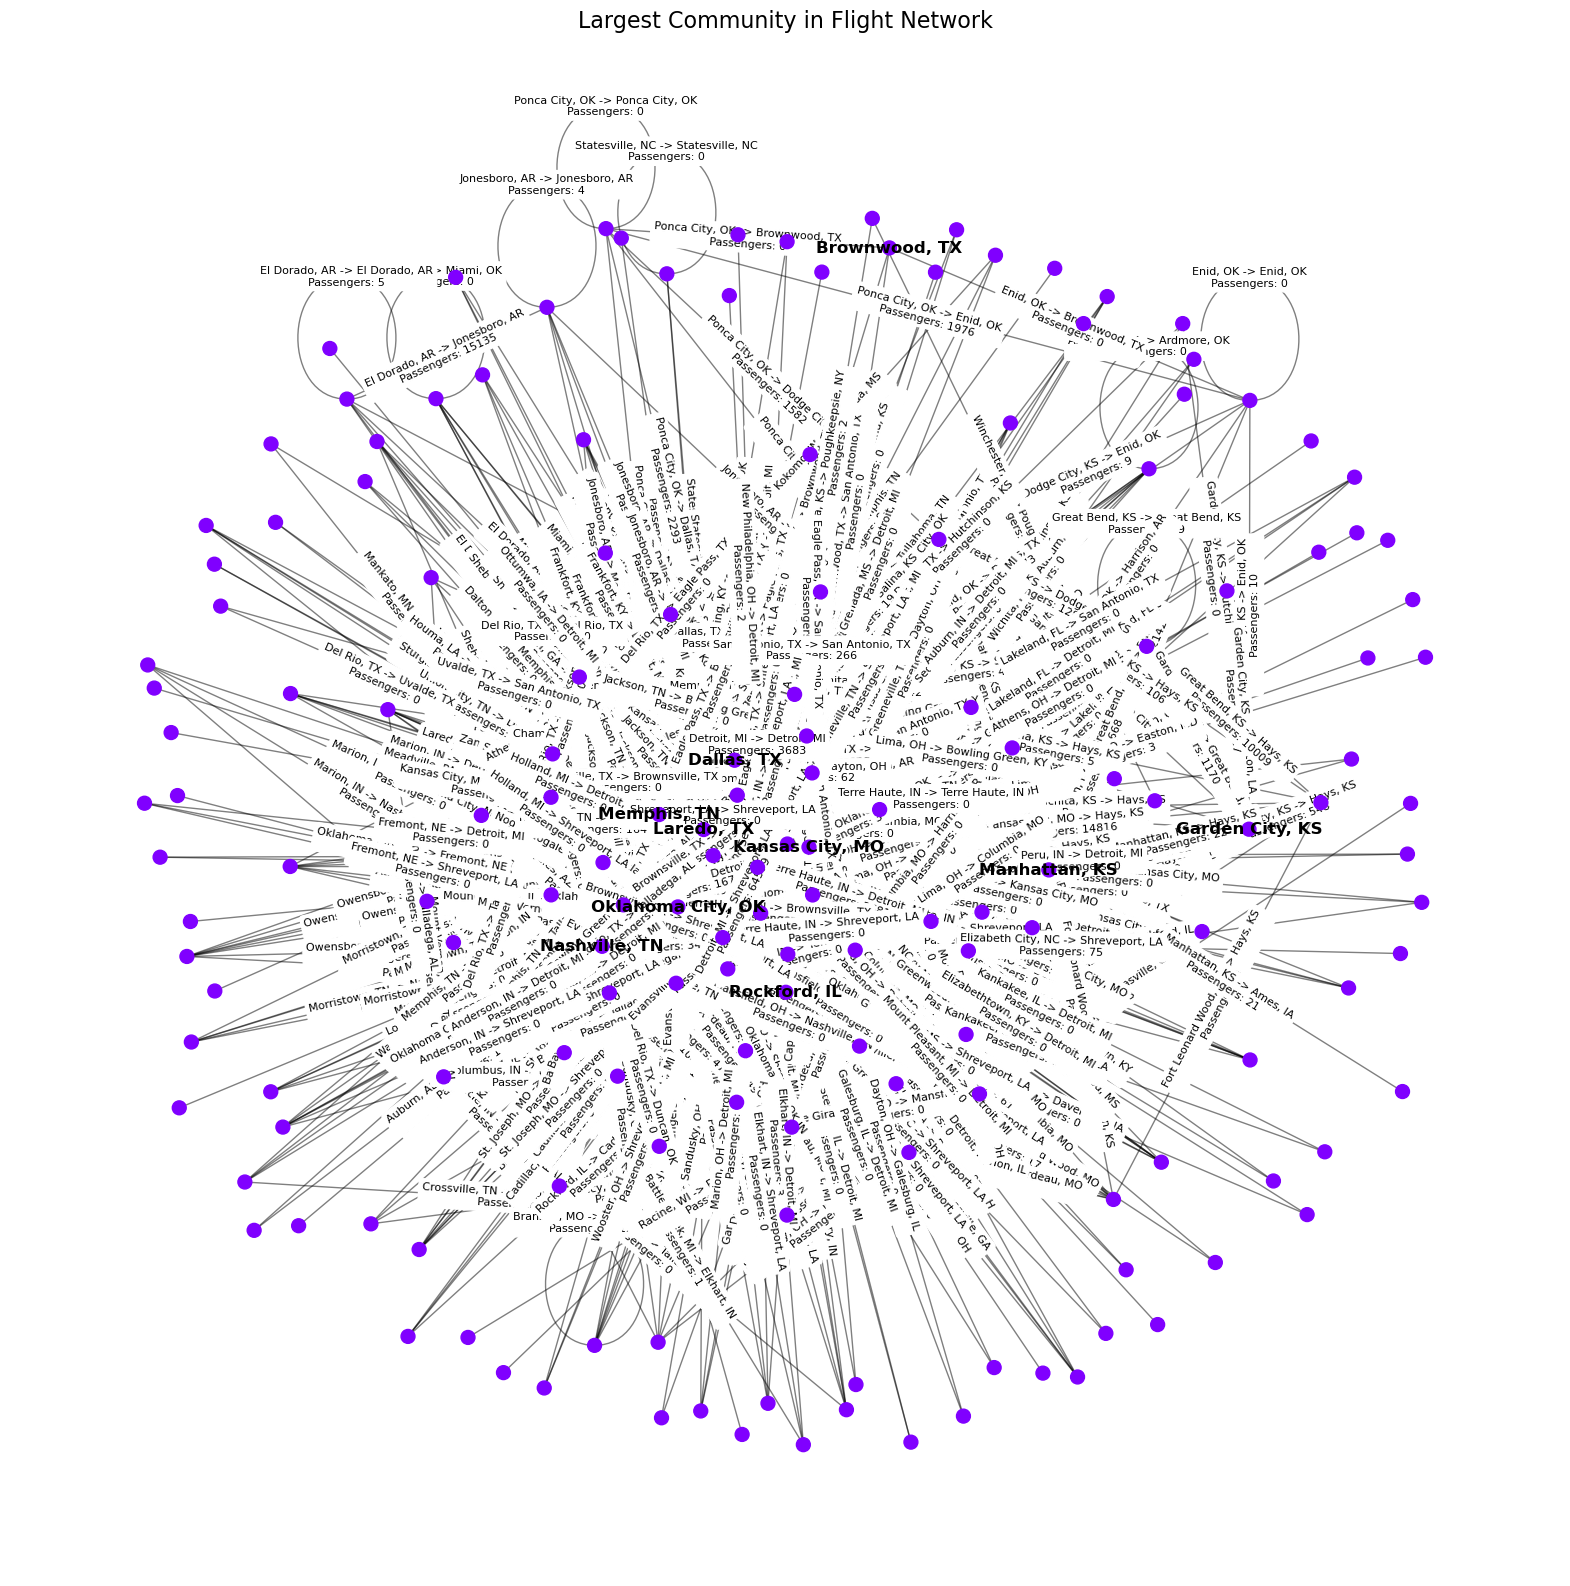

Abilene, TX and Atlanta, GA belong to the same community.

Total communities detected: 5
Community 0: Aberdeen, SD, Brainerd, MN, Eau Claire, WI, Grand Forks, ND, Huron, SD, Jamestown, ND, Mason City, IA, Minneapolis, MN, Omaha, NE, Pierre, SD...
Community 1: Anchorage, AK, Billings, MT, Bismarck, ND, Elko, NV, Rapid City, SD, Salt Lake City, UT, Tucson, AZ, Albuquerque, NM, Amarillo, TX, El Paso, TX...
Community 3: Kansas City, MO, Manhattan, KS, Brownwood, TX, Dallas, TX, Garden City, KS, Laredo, TX, Memphis, TN, Nashville, TN, Oklahoma City, OK, Rockford, IL...
Community 4: Orlando, FL, Abilene, TX, Atlanta, GA, Austin, TX, Beaumont, TX, College Station, TX, Corpus Christi, TX, Jackson, MS, Killeen, TX, Lake Charles, LA...
Community 2: South Bend, IN, Washington, DC, Atlantic City, NJ, Bangor, ME, Boston, MA, Grand Rapids, MI, Indianapolis, IN, Knoxville, TN, New York, NY, Akron, OH...


In [241]:
# Example usage
analyze_flight_network(airports_df, 'Abilene, TX', 'Atlanta, GA')

***2. The Alternative Algorithm suggested by LLM for extracting communities***

In [257]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import community as community_louvain

def girvan_newman_community_detection(G):
    # Apply the Girvan-Newman algorithm
    communities_generator = girvan_newman(G)
    
    # Retrieve the first set of communities
    first_communities = next(communities_generator)
    
    # Convert communities into a dictionary format
    community_dict = {}
    for i, community in enumerate(first_communities):
        for node in community:
            community_dict[node] = i

    return community_dict, list(first_communities)

def compare_community_detection(airports_df):
    # Build the graph
    edges = airports_df[['Origin_city', 'Destination_city', 'Passengers']]
    edges = edges.groupby(['Origin_city', 'Destination_city']).agg({'Passengers': 'sum'}).reset_index()
    
    G = nx.Graph()
    for _, row in edges.iterrows():
        G.add_edge(row['Origin_city'], row['Destination_city'], passengers=row['Passengers'])

    # Louvain community detection
    louvain_partition = community_louvain.best_partition(G)
    
    # Girvan-Newman community detection
    gn_partition, gn_communities = girvan_newman_community_detection(G)

    # Print Louvain Communities
    print("\n--- Louvain Communities ---")
    louvain_communities = {}
    for node, community_id in louvain_partition.items():
        if community_id not in louvain_communities:
            louvain_communities[community_id] = []
        louvain_communities[community_id].append(node)
    for community_id, cities in louvain_communities.items():
        print(f"Community {community_id}: {len(cities)} cities, example: {', '.join(cities[:5])}...")

    # Print Girvan-Newman Communities
    print("\n--- Girvan-Newman Communities ---")
    for i, community in enumerate(gn_communities):
        print(f"Community {i}: {len(community)} cities, example: {', '.join(list(community)[:5])}...")

    # Visualization
    pos = nx.spring_layout(G, k=0.3, seed=42)

    plt.figure(figsize=(20, 10))

    # Plot Louvain results
    plt.subplot(121)
    louvain_colors = [louvain_partition[node] for node in G.nodes()]
    nx.draw(G, pos, node_size=20, node_color=louvain_colors, cmap=plt.cm.rainbow, alpha=0.8)
    plt.title("Louvain Community Detection", fontsize=16)

    # Plot Girvan-Newman results
    plt.subplot(122)
    gn_colors = [gn_partition[node] if node in gn_partition else 0 for node in G.nodes()]
    nx.draw(G, pos, node_size=20, node_color=gn_colors, cmap=plt.cm.rainbow, alpha=0.8)
    plt.title("Girvan-Newman Community Detection", fontsize=16)

    plt.show()



--- Louvain Communities ---
Community 0: 170 cities, example: Aberdeen, SD, Anchorage, AK, Billings, MT, Bismarck, ND, Brainerd, MN...
Community 2: 120 cities, example: Eau Claire, WI, Orlando, FL, South Bend, IN, Washington, DC, Wausau, WI...
Community 1: 168 cities, example: Kansas City, MO, Manhattan, KS, Mason City, IA, Garden City, KS, Laredo, TX...
Community 3: 105 cities, example: Abilene, TX, Atlanta, GA, Austin, TX, Beaumont, TX, Brownwood, TX...

--- Girvan-Newman Communities ---
Community 0: 562 cities, example: Dothan, AL, Knoxville, TN, Oak Harbor, WA, Bloomington, IL, Orangeburg, SC...
Community 1: 1 cities, example: Blackfoot, ID...


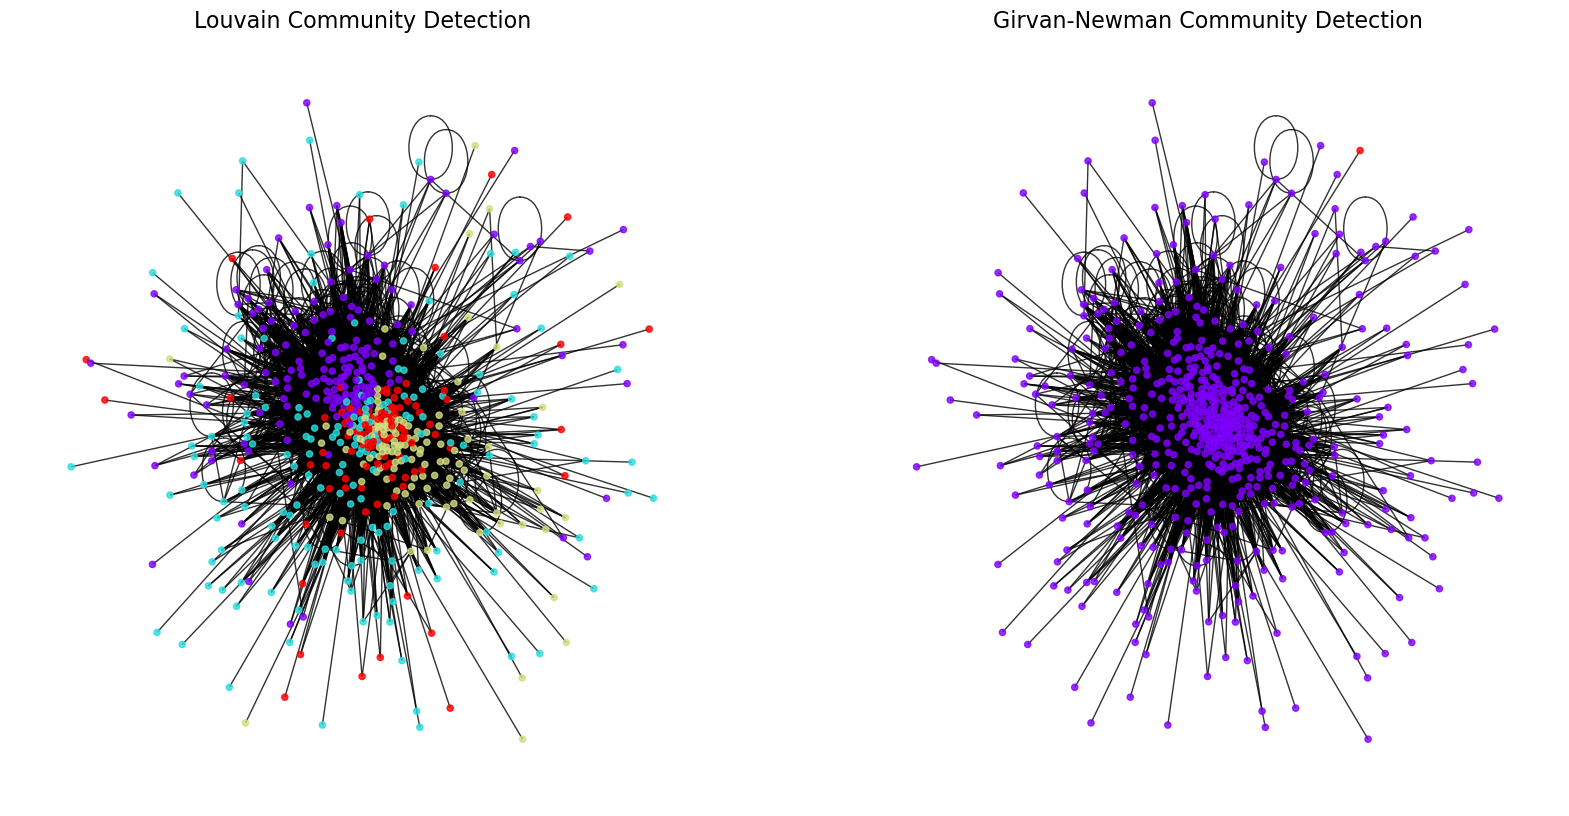

In [259]:
compare_community_detection(airports_df)

Louvain Method:

Pros:
- Greedy optimizing makes it all very scalable to larger networks.
- Runs fast, finds communities of high modularity.

Cons:
- This process is less deterministic, as results depend on initial conditions.
- Prune iteratively. But local minima problem--e.g. may miss smaller communities if modularity low.

Girvan-Newman Method:

Pros:
- More proficient in identifying smaller communities or isolated subpopulations.
- Deterministic, leads to more predictable results.

Cons:
- All this is expensive in terms of calculation, especially for large networks since edge betweenness has to be calculated again and again.
- Risk of prematurely breaking large, connected communities.

Comparison of Results:
- Louvain: May find large, modular communities (especially for dense graphs like flight networks).
- Girvan-Newman: Will probably separate the network into a lot of smaller networks, especially for sparse networks.

Conclusion:
Which Approach is Better: The decision depends on the Graph structure and the purpose of analysis. Due to this, for larger networks, such as the flight dataset, Louvain is usually better as it can scale better, while it also means we make less of a compromise with modularity. The Girvan-Newman algorithm is more useful in cases when you want to, for example, understand hierarchical structures or when focusing on small, well-defined groups.
